In [1]:
import matplotlib.pyplot as plt 
import tensorflow as tf 
import numpy as np 
import cv2 
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import BatchNormalization, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, BatchNormalization, Dropout, Flatten, Dense, Activation, MaxPooling2D, Conv2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.utils import to_categorical

%matplotlib inline

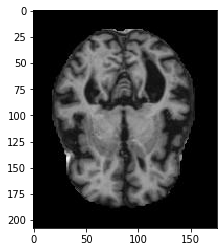

In [2]:
img=image.load_img("Alzheimer_s Dataset/train/MildDemented/mildDem0.jpg")
plt.imshow(img)

In [3]:
cv2.imread("Alzheimer_s Dataset/train/MildDemented/mildDem0.jpg").shape

(208, 176, 3)

In [4]:
train=ImageDataGenerator(rescale=1./255)
validation=ImageDataGenerator(rescale=1./255)

In [5]:
train_dataset=train.flow_from_directory('Alzheimer_s Dataset/train/',target_size=(208, 176),batch_size=3,class_mode='categorical')

validation_dataset=validation.flow_from_directory('Alzheimer_s Dataset/test/',target_size=(208, 176),batch_size=3,class_mode='categorical')

Found 5121 images belonging to 4 classes.
Found 1279 images belonging to 4 classes.


In [6]:
train_dataset.class_indices

{'MildDemented': 0,
 'ModerateDemented': 1,
 'NonDemented': 2,
 'VeryMildDemented': 3}

In [7]:
def build_model():
    
    '''Sequential Model creation'''
    model = Sequential()
    
    model.add(Conv2D(16,(3,3),padding='same',input_shape = (208, 176,3),activation='relu'))
    
    model.add(Conv2D(32,(3,3),padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding = 'same'))
    
    model.add(Conv2D(32,(3,3),padding='same',activation='relu'))
    
    
    model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding = 'same'))
    
    model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
    
    model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding = 'same'))
    
    model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
    
    model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding = 'same'))
    
    
    model.add(Flatten())
    model.add(Dense(32))
    model.add(Dense(32))
    model.add(Dense(32))
    model.add(Dense(512))
    model.add(Dense(4))
    model.add(Activation('softmax'))
    
    return model

model = build_model()

In [8]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
       
]

In [9]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
    name='Adam',), loss='categorical_crossentropy',metrics=METRICS)

In [10]:
model_fit=model.fit(train_dataset,
                        batch_size=128,
                        epochs = 10,
                        validation_data=validation_dataset,
                        )

Epoch 1/10
1707/1707 [==============================] - 974s 571ms/step - loss: 1.0086 - accuracy: 0.7710 - precision: 0.5915 - val_loss: 0.9430 - val_accuracy: 0.7811 - val_precision: 0.5878
Epoch 2/10
1707/1707 [==============================] - 1042s 610ms/step - loss: 0.8226 - accuracy: 0.8138 - precision: 0.6856 - val_loss: 1.0333 - val_accuracy: 0.7993 - val_precision: 0.6054
Epoch 3/10
1707/1707 [==============================] - 1114s 653ms/step - loss: 0.5528 - accuracy: 0.8802 - precision: 0.7816 - val_loss: 1.0849 - val_accuracy: 0.7967 - val_precision: 0.5946
Epoch 4/10
1707/1707 [==============================] - 951s 557ms/step - loss: 0.2613 - accuracy: 0.9500 - precision: 0.9038 - val_loss: 1.0173 - val_accuracy: 0.8165 - val_precision: 0.6380
Epoch 5/10
1707/1707 [==============================] - 1026s 601ms/step - loss: 0.1265 - accuracy: 0.9766 - precision: 0.9544 - val_loss: 1.8412 - val_accuracy: 0.7979 - val_precision: 0.5962
Epoch 6/10
1707/1707 [===============

In [12]:
test_acc=model.evaluate(validation_dataset)

print('Test accuracy:',test_acc)

427/427 [==============================] - 56s 130ms/step - loss: 2.1660 - accuracy: 0.8231 - precision: 0.6470
Test accuracy: [2.166043996810913, 0.8231039643287659, 0.6470125913619995]


In [11]:

model.predict(validation_dataset)

array([[2.9638765e-04, 1.8713479e-08, 9.7327900e-01, 2.6424535e-02],
       [2.4086074e-03, 2.7796709e-06, 9.3115503e-01, 6.6433616e-02],
       [3.5918603e-04, 3.1328820e-08, 9.7080135e-01, 2.8839428e-02],
       ...,
       [8.3388701e-02, 3.1768566e-03, 6.2779868e-01, 2.8563577e-01],
       [1.1991054e-02, 1.2135802e-04, 8.6278015e-01, 1.2510738e-01],
       [2.6648545e-01, 1.3332054e-02, 3.1230789e-01, 4.0787458e-01]],
      dtype=float32)

In [13]:
model.save('alzheimers.h5')